# KMeans on Music Streaming Data

Using Music data which contains sociodemographic and music preference data on 4,914 users we will identify clusters of users based on this information.

| Column | Description |
|:-|:-|
| Age | Age of the user |
| Gender | Gender of the user |
| Employment status | Employment status of the user |
| Annual income | Annual income of the user in USD |
| Usage per month | Average usage per month of the user measured in minutes |
| Top genre | The genre of music that is most streamed by the user |
| Num of days active | The number of days in the last 365 days that the user used the service |



In [6]:
#Data Wrangling
import numpy as np
import pandas as pd

#Plotting
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

#kmeans
from sklearn.cluster import KMeans

#PCA
from sklearn.decomposition import PCA

#Preprocessing
from sklearn.preprocessing import scale

%matplotlib inline

Load, Examine, & Clean Data

In [ ]:
#Load Data
music = pd.read_csv('music.csv')

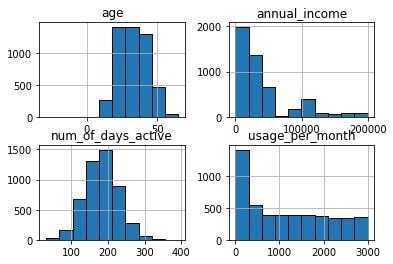

In [ ]:
# Examine Data
music.hist(bins=10, edgecolor='black')
plt.show()

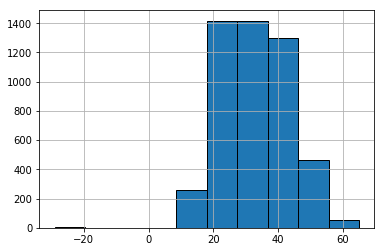

In [ ]:
music['age'].hist(bins=10, edgecolor='black')
plt.show()

In [ ]:
#Get number of Male/Female users
male_count = music[music['gender'] == 'Male'].shape[0]
female_count = music[music['gender'] == 'Female'].shape[0]

print(male_count)
print(female_count)

2482
2350


In [ ]:
#Get count of music genres
genre_counts = music['top_genre'].value_counts()
genre_counts

Pop          2149
Rock          835
Classical     721
Country       556
Indie         289
Jazz          265
Hip Hop        99
Name: top_genre, dtype: int64

In [ ]:
#Get count of employment status
employment_counts = music['employment_status'].value_counts()
employment_counts

Employed full-time    3037
Student               1000
Employed part-time     513
Unemployed             364
Name: employment_status, dtype: int64

In [ ]:
# Drop rows with invalid entries in-place
music.drop(music[music['age'] < 0].index, inplace=True)
music.drop(music[music['num_of_days_active'] > 365].index, inplace=True)

Clustering

In [ ]:
# Standardize Data (age, annual income, usage per month and number of days active)
X_scaled = scale(music[['age','annual_income','usage_per_month', 'num_of_days_active']])

In [ ]:
# Loop through 1-10 clusters and record each model's sum of squared distances

ssd = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, random_state = 42).fit(X_scaled)
    ssd.append(kmeans.inertia_)
    
min_ssd = min(ssd)

[19628.000000000004, 15280.264777566385, 12078.349976625346, 10201.534279457741, 8889.451085738283, 8019.866132430932, 7371.968329973683, 6770.424975377446, 6323.627120012206]


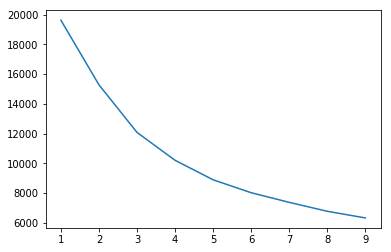

In [ ]:
# Plot ssds by number of clusters
print(ssd)

plt.plot(range(1,10), ssd, label='Line Plot')

In [ ]:
# Retrain model using best number of clusters (elbow method)
optimal_K = 4
best_kmeans = KMeans(n_clusters = optimal_K, random_state = 42).fit(X_scaled)

# Visualizing

We will train a model on 4 variables, then use dimensionality reduction to plot the groups on a 2-D plane.

First we will train a new K-means model with 2 clusters using the following features as inputs: `age`, `annual income`, `usage per month` and `number of days active`. 

In [ ]:
X_scaled = scale(music[['age','annual_income','usage_per_month', 'num_of_days_active']])

kmeans_2 = KMeans(n_clusters = 2, random_state = 42).fit(X_scaled)
pred = kmeans_2.predict(X_scaled)

Now use PCA to reduce to only 2 features.

In [ ]:
pca = PCA(n_components = 2, random_state = 42)
X_reduced = pca.fit_transform(X_scaled)

print(X_reduced[:,0],X_reduced[:,1])

pca.components_

[ 0.02451336 -1.09975433  0.03565931 ... -0.06659287  1.19132401
  0.62249979] [ 0.41629098  0.83009016 -0.5768578  ...  0.34744777 -1.7933613
  1.01145131]


array([[ 0.63860072,  0.55935233,  0.52414577,  0.06771481],
       [-0.08104734, -0.1505042 ,  0.13323862,  0.97623116]])

Now we plot a scatterplot of the groups based on the reduced features.

In [ ]:
df = pd.DataFrame({
    'pred': pred,
    'pc1': X_reduced[:,0],
    'pc2': X_reduced[:,1]
})

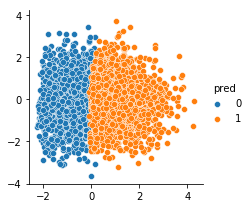

In [ ]:
g = sns.FacetGrid(df, hue="pred")
g.map_dataframe(sns.scatterplot, x='pc1', y='pc2')
g.add_legend()